In [1]:
# Initial imports.
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import StandardScaler

In [2]:
# Import population csv and drop unnecessary columns
population_df = pd.read_csv("../resources/census_api/census_population_data.csv")
population_df.drop(['county_name', 'county_id', 'state_id'], axis=1, inplace=True)
population_df.head()

,geo_id,population,avg_household_size
0,0500000US06033,64148,2.43
1,0500000US06043,17540,2.13
2,0500000US06115,75493,2.83
3,0500000US06013,1133247,2.86
4,0500000US06035,31185,2.23


In [3]:
# Read in fcc_summary_data and drop duplicate/unnecessary columns
fcc_summary_df = pd.read_csv("../resources/fcc/fcc_ml_summary_final.csv")
fcc_summary_df.head()

,geo_id,dl_speed_100_ua,dl_speed_level_up,level_up_access_pop_percent
0,0500000US06001,25.0,100.0,0.989920
1,0500000US06003,25.0,100.0,0.116918
2,0500000US06005,25.0,100.0,0.325451
3,0500000US06007,25.0,100.0,0.878172
4,0500000US06009,25.0,100.0,0.812635


In [4]:
# Merging the two tables on 'geo_id' column
internet_access_df = pd.merge(population_df, fcc_summary_df, on =["geo_id"])
internet_access_df.head()

,geo_id,population,avg_household_size,dl_speed_100_ua,dl_speed_level_up,level_up_access_pop_percent
0,0500000US06033,64148,2.43,25.0,100.0,0.880890
1,0500000US06043,17540,2.13,25.0,100.0,0.407778
2,0500000US06115,75493,2.83,25.0,100.0,0.758733
3,0500000US06013,1133247,2.86,25.0,100.0,0.976652
4,0500000US06035,31185,2.23,25.0,100.0,0.517515


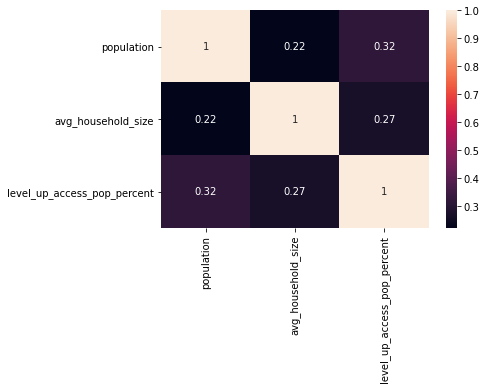

In [5]:
# New df for coreelation matrix and hot map
fcc_pop_corr_df = internet_access_df
fcc_pop_corr_df.drop(['dl_speed_100_ua', 'dl_speed_level_up'], axis = 1, inplace = True)
corrMatrix = fcc_pop_corr_df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

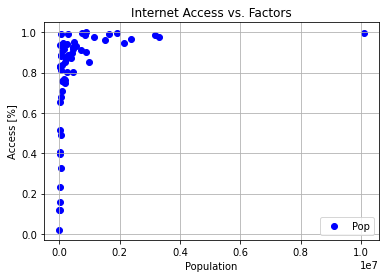

In [63]:
# plt.scatter(internet_access_df.population, internet_access_df.level_up_access_pop_percent, color='blue', label="Pop")

# plt.legend(loc="lower right")
# plt.title("Internet Access vs. Factors")
# plt.xlabel("Population")
# plt.ylabel("Access [%]")
# plt.grid()
# plt.show()

In [7]:
# plt.scatter(internet_access_df.avg_household_size, internet_access_df.level_up_access_pop_percent, color='green', label='HH Size')

# plt.legend(loc="lower right")
# plt.title("Internet Access vs. Factors")
# plt.xlabel("HH Size")
# plt.ylabel("Access [%]")
# plt.grid()
# plt.show()

In [8]:
# Read in census_sex_data and drop duplicate columns
census_sex_df = pd.read_csv("../resources/census_api/census_sex_data.csv")
census_sex_df.drop(['county_name', 'county_id', 'state_id'], axis=1, inplace=True)
census_sex_df.head()

,geo_id,sex_total_men,sex_total_women
0,0500000US06033,31879,32269
1,0500000US06043,8920,8620
2,0500000US06115,38468,37025
3,0500000US06013,553701,579546
4,0500000US06035,20671,10514


In [9]:
# Merging the two tables on 'geo_id' column
internet_access_df = pd.merge(internet_access_df, census_sex_df, on =["geo_id"])
# perct = internet_access_df.values
# internet_access_df.iloc[:, 4:] = perct[:, 4:]/perct[:, 1, None]
internet_access_df.head()

,geo_id,population,avg_household_size,level_up_access_pop_percent,sex_total_men,sex_total_women
0,0500000US06033,64148,2.43,0.880890,31879,32269
1,0500000US06043,17540,2.13,0.407778,8920,8620
2,0500000US06115,75493,2.83,0.758733,38468,37025
3,0500000US06013,1133247,2.86,0.976652,553701,579546
4,0500000US06035,31185,2.23,0.517515,20671,10514


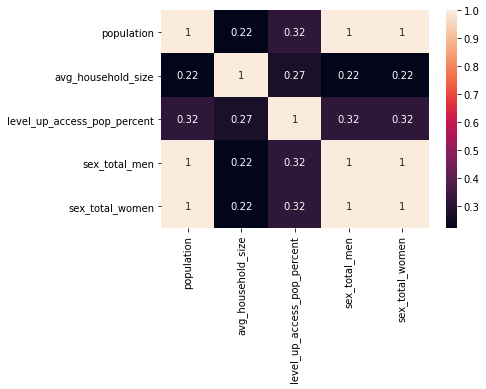

In [10]:
# New df for coreelation matrix and hot map
sex_corr_df = internet_access_df
corrMatrix = sex_corr_df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [11]:
# plt.scatter(internet_access_df.sex_total_men, internet_access_df.level_up_access_pop_percent, color='blue', label="Men")
# plt.scatter(internet_access_df.sex_total_women, internet_access_df.level_up_access_pop_percent, color='green', label='Women')



# plt.legend(loc="lower right")
# plt.title("Internet Access vs. Factors")
# plt.xlabel("Population")
# plt.ylabel("Access [%]")
# plt.grid()
# plt.show()

In [12]:
internet_access_df.shape

(58, 6)

In [13]:
# Read in census_race_data and drop duplicate/unnecessary columns
census_race_df = pd.read_csv("../resources/census_api/census_race_data.csv")
census_race_df.drop(['race_total_population', 'county_name', 'county_id', 'state_id'], axis=1, inplace=True)
census_race_df.head()

,geo_id,race_hispanic_or_latino,race_not_hispanic_or_latino,race_american_indian_and_alaska_native,race_asian,race_black_or_african_american,race_native_hawaiian_and_other_pacific_islander,race_some_other_race,race_two_or_more,race_two_or_more_excluding_some_ther_and_three_or_more,race_two_or_more_including_some_other,race_white_alone
0,0500000US06033,12830,51318,2090,642,1426,30,142,1365,1348,17,45623
1,0500000US06043,1909,15631,390,243,166,54,20,633,627,6,14125
2,0500000US06115,20990,54503,643,4977,2340,292,126,4040,3982,58,42085
3,0500000US06013,288101,845146,2376,182135,93683,5251,3829,54921,53181,1740,502951
4,0500000US06035,5834,25351,847,436,2695,205,22,618,559,59,20528


In [14]:
# Merging the two tables on 'geo_id' column
internet_access_df = pd.merge(internet_access_df, census_race_df, on =["geo_id"])
# perct = internet_access_df.values
# internet_access_df.iloc[:, 6:] = perct[:, 6:]/perct[:, 1, None]
internet_access_df.head()

,geo_id,population,avg_household_size,level_up_access_pop_percent,sex_total_men,sex_total_women,race_hispanic_or_latino,race_not_hispanic_or_latino,race_american_indian_and_alaska_native,race_asian,race_black_or_african_american,race_native_hawaiian_and_other_pacific_islander,race_some_other_race,race_two_or_more,race_two_or_more_excluding_some_ther_and_three_or_more,race_two_or_more_including_some_other,race_white_alone
0,0500000US06033,64148,2.43,0.880890,31879,32269,12830,51318,2090,642,1426,30,142,1365,1348,17,45623
1,0500000US06043,17540,2.13,0.407778,8920,8620,1909,15631,390,243,166,54,20,633,627,6,14125
2,0500000US06115,75493,2.83,0.758733,38468,37025,20990,54503,643,4977,2340,292,126,4040,3982,58,42085
3,0500000US06013,1133247,2.86,0.976652,553701,579546,288101,845146,2376,182135,93683,5251,3829,54921,53181,1740,502951
4,0500000US06035,31185,2.23,0.517515,20671,10514,5834,25351,847,436,2695,205,22,618,559,59,20528


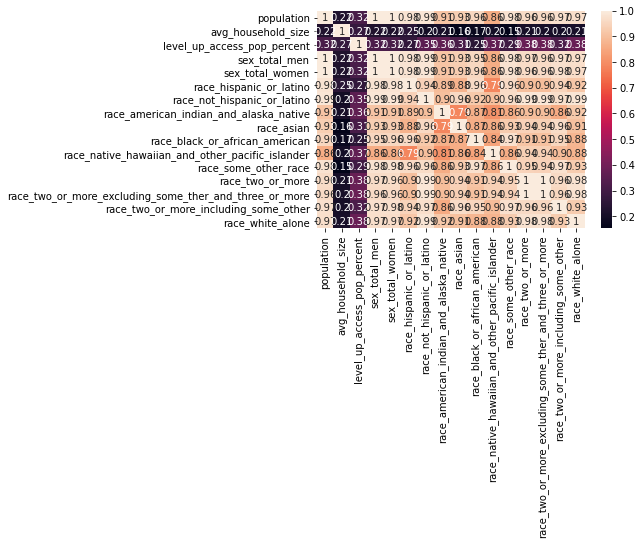

In [15]:
# New df for coreelation matrix and hot map
race_corr_df = internet_access_df
corrMatrix = race_corr_df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [16]:
# plt.scatter(internet_access_df.race_hispanic_or_latino, internet_access_df.level_up_access_pop_percent, color='blue', label="Hispanic")
# plt.scatter(internet_access_df.race_not_hispanic_or_latino, internet_access_df.level_up_access_pop_percent, color='green', label="Not Hispanic")
# plt.scatter(internet_access_df.race_american_indian_and_alaska_native, internet_access_df.level_up_access_pop_percent, color='red', label="Native")
# plt.scatter(internet_access_df.race_asian, internet_access_df.level_up_access_pop_percent, color='yellow', label="Asian")
# plt.scatter(internet_access_df.race_black_or_african_american, internet_access_df.level_up_access_pop_percent, color='black', label="Black")
# plt.scatter(internet_access_df.race_native_hawaiian_and_other_pacific_islander, internet_access_df.level_up_access_pop_percent, color='brown', label="Hawaiian")
# plt.scatter(internet_access_df.race_some_other_race, internet_access_df.level_up_access_pop_percent, color='pink', label="Other")
# plt.scatter(internet_access_df.race_two_or_more, internet_access_df.level_up_access_pop_percent, color='orange', label="Two +")
# plt.scatter(internet_access_df.race_two_or_more_excluding_some_ther_and_three_or_more, internet_access_df.level_up_access_pop_percent, color='grey', label="Two - Other")
# plt.scatter(internet_access_df.race_two_or_more_including_some_other, internet_access_df.level_up_access_pop_percent, color='purple', label="Two + Other")
# plt.scatter(internet_access_df.race_white_alone, internet_access_df.level_up_access_pop_percent, color='DarkBlue', label="White")


# plt.legend(loc="lower right")
# plt.title("Internet Access vs. Race")
# plt.xlabel("Population")
# plt.ylabel("Access [%]")
# plt.grid()
# plt.show()

In [17]:
internet_access_df.shape

(58, 17)

In [18]:
# Read in census_occupation_data and drop duplicate/unnecessary columns
census_occupation_df = pd.read_csv("../resources/census_api/census_occupation_data.csv")
census_occupation_df.drop([ 'county_name', 'county_id', 'state_id'], axis=1, inplace=True)
census_occupation_df.head()

,geo_id,occupation_population_16_and_over_total,occupation_management_business_science_and_arts,occupation_service,occupation_sales_and_office,occupation_natural_resources_construction_and_maintenance,occupation_production_transporation_and_material_moving
0,0500000US06033,23589,6424,6385,4546,3687,2547
1,0500000US06043,7051,2043,2154,1485,657,712
2,0500000US06115,28954,7773,5950,6599,4331,4301
3,0500000US06013,547323,240244,96666,118637,42681,49095
4,0500000US06035,8788,2562,2328,1768,1032,1098


In [19]:
# Merging the two tables on 'geo_id' column
internet_access_df = pd.merge(internet_access_df, census_occupation_df, on =["geo_id"])
# perct = internet_access_df.values
# internet_access_df.iloc[:, 17:] = perct[:, 17:]/perct[:, 1, None]
internet_access_df.head()

,geo_id,population,avg_household_size,level_up_access_pop_percent,sex_total_men,sex_total_women,race_hispanic_or_latino,race_not_hispanic_or_latino,race_american_indian_and_alaska_native,race_asian,...,race_two_or_more,race_two_or_more_excluding_some_ther_and_three_or_more,race_two_or_more_including_some_other,race_white_alone,occupation_population_16_and_over_total,occupation_management_business_science_and_arts,occupation_service,occupation_sales_and_office,occupation_natural_resources_construction_and_maintenance,occupation_production_transporation_and_material_moving
0,0500000US06033,64148,2.43,0.880890,31879,32269,12830,51318,2090,642,...,1365,1348,17,45623,23589,6424,6385,4546,3687,2547
1,0500000US06043,17540,2.13,0.407778,8920,8620,1909,15631,390,243,...,633,627,6,14125,7051,2043,2154,1485,657,712
2,0500000US06115,75493,2.83,0.758733,38468,37025,20990,54503,643,4977,...,4040,3982,58,42085,28954,7773,5950,6599,4331,4301
3,0500000US06013,1133247,2.86,0.976652,553701,579546,288101,845146,2376,182135,...,54921,53181,1740,502951,547323,240244,96666,118637,42681,49095
4,0500000US06035,31185,2.23,0.517515,20671,10514,5834,25351,847,436,...,618,559,59,20528,8788,2562,2328,1768,1032,1098


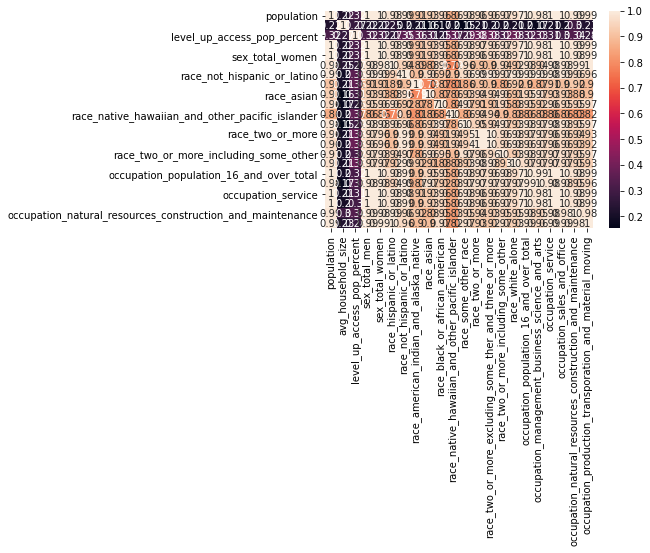

In [20]:
# New df for coreelation matrix and hot map
ocp_corr_df = internet_access_df
corrMatrix = ocp_corr_df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [21]:
internet_access_df.shape

(58, 23)

In [22]:
# Read in census_internet_data and drop duplicate/unnecessary columns
census_internet_df = pd.read_csv("../resources/census_api/census_internet_data.csv")
census_internet_df.drop([ 'county_name', 'county_id', 'state_id'], axis=1, inplace=True)
census_internet_df.head()

,geo_id,hh_with_computer_and_internet_total,hh_with_computer,hh_with_bb_internet_subscription
0,0500000US06033,25966,21733,18861
1,0500000US06043,7700,6710,5861
2,0500000US06115,26179,23373,21034
3,0500000US06013,392277,370116,353692
4,0500000US06035,9493,7990,7227


In [23]:
# Merging the two tables on 'geo_id' column
internet_access_df = pd.merge(internet_access_df, census_internet_df, on =["geo_id"])
# perct = internet_access_df.values
# internet_access_df.iloc[:, 23:] = perct[:, 23:]/perct[:, 1, None]
internet_access_df.head()

,geo_id,population,avg_household_size,level_up_access_pop_percent,sex_total_men,sex_total_women,race_hispanic_or_latino,race_not_hispanic_or_latino,race_american_indian_and_alaska_native,race_asian,...,race_white_alone,occupation_population_16_and_over_total,occupation_management_business_science_and_arts,occupation_service,occupation_sales_and_office,occupation_natural_resources_construction_and_maintenance,occupation_production_transporation_and_material_moving,hh_with_computer_and_internet_total,hh_with_computer,hh_with_bb_internet_subscription
0,0500000US06033,64148,2.43,0.880890,31879,32269,12830,51318,2090,642,...,45623,23589,6424,6385,4546,3687,2547,25966,21733,18861
1,0500000US06043,17540,2.13,0.407778,8920,8620,1909,15631,390,243,...,14125,7051,2043,2154,1485,657,712,7700,6710,5861
2,0500000US06115,75493,2.83,0.758733,38468,37025,20990,54503,643,4977,...,42085,28954,7773,5950,6599,4331,4301,26179,23373,21034
3,0500000US06013,1133247,2.86,0.976652,553701,579546,288101,845146,2376,182135,...,502951,547323,240244,96666,118637,42681,49095,392277,370116,353692
4,0500000US06035,31185,2.23,0.517515,20671,10514,5834,25351,847,436,...,20528,8788,2562,2328,1768,1032,1098,9493,7990,7227


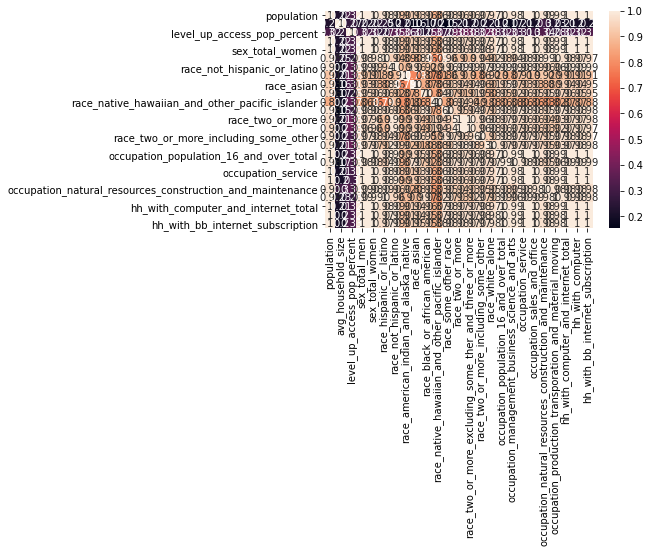

In [24]:
# New df for coreelation matrix and hot map
int_corr_df = internet_access_df
corrMatrix = int_corr_df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [25]:
internet_access_df.shape

(58, 26)

In [26]:
# Read in census_industry_data and drop duplicate/unnecessary columns
census_industry_df = pd.read_csv("../resources/census_api/census_industry_data.csv")
census_industry_df.drop([ 'county_name', 'county_id', 'state_id'], axis=1, inplace=True)
census_industry_df.head()

,geo_id,industry_agriculture_forestry_fishing_and_hunting_and_mining,industry_construction,industry_manufacturing,industry_wholesale_trade,industry_retail_trade,industry_transportation_and_warehousing_and_utilities,industry_information,industry_finance_and_insurance_real_estate_and_rental_and_leasing,industry_professional_scientific_management_administrative_and_waste_management_services,industry_educational_services_health_care_and_social_assistance,industry_arts_entertainment_recreation_accommodation_and_food_services,industry_other_services_except_public_administration,industry_public_administration
0,0500000US06033,1658,2083,909,382,2759,1121,313,724,2590,5898,1978,1301,1873
1,0500000US06043,270,304,348,92,816,244,74,214,739,1221,1791,167,771
2,0500000US06115,1230,2700,1689,698,3754,1415,586,1215,2803,6188,2642,1246,2788
3,0500000US06013,3698,38721,36881,12747,56545,28780,15140,46505,88220,120380,49287,28545,21874
4,0500000US06035,585,587,151,102,705,284,93,218,307,1945,614,253,2944


In [27]:
# Merging the two tables on 'geo_id' column
internet_access_df = pd.merge(internet_access_df, census_industry_df, on =["geo_id"])
# perct = internet_access_df.values
# internet_access_df.iloc[:, 26:] = perct[:, 26:]/perct[:, 1, None]
internet_access_df.head()

,geo_id,population,avg_household_size,level_up_access_pop_percent,sex_total_men,sex_total_women,race_hispanic_or_latino,race_not_hispanic_or_latino,race_american_indian_and_alaska_native,race_asian,...,industry_wholesale_trade,industry_retail_trade,industry_transportation_and_warehousing_and_utilities,industry_information,industry_finance_and_insurance_real_estate_and_rental_and_leasing,industry_professional_scientific_management_administrative_and_waste_management_services,industry_educational_services_health_care_and_social_assistance,industry_arts_entertainment_recreation_accommodation_and_food_services,industry_other_services_except_public_administration,industry_public_administration
0,0500000US06033,64148,2.43,0.880890,31879,32269,12830,51318,2090,642,...,382,2759,1121,313,724,2590,5898,1978,1301,1873
1,0500000US06043,17540,2.13,0.407778,8920,8620,1909,15631,390,243,...,92,816,244,74,214,739,1221,1791,167,771
2,0500000US06115,75493,2.83,0.758733,38468,37025,20990,54503,643,4977,...,698,3754,1415,586,1215,2803,6188,2642,1246,2788
3,0500000US06013,1133247,2.86,0.976652,553701,579546,288101,845146,2376,182135,...,12747,56545,28780,15140,46505,88220,120380,49287,28545,21874
4,0500000US06035,31185,2.23,0.517515,20671,10514,5834,25351,847,436,...,102,705,284,93,218,307,1945,614,253,2944


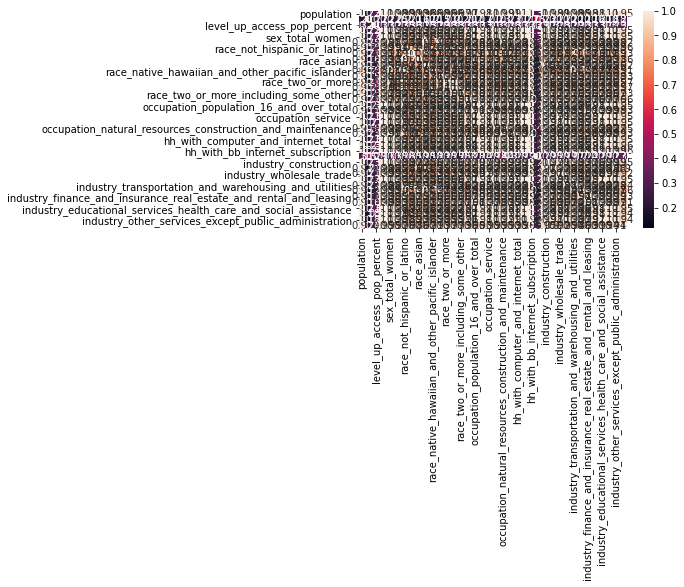

In [28]:
# New df for coreelation matrix and hot map
ind_corr_df = internet_access_df
corrMatrix = ind_corr_df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [29]:
internet_access_df.shape

(58, 39)

In [30]:
# Read in census_income_data and drop duplicate/unnecessary columns
census_income_df = pd.read_csv("../resources/census_api/census_income_data.csv")
census_income_df.drop([ 'county_name', 'county_id', 'state_id'], axis=1, inplace=True)
census_income_df.head()

,geo_id,hh_with_income_total,hh_with_income_less_than_10000,hh_with_income_10000-14999,hh_with_income_15000-24999,hh_with_income_25000-34999,hh_with_income_35000-49999,hh_with_income50000-74999,hh_with_income_75000-99999,hh_with_income_100000-149999,hh_with_income_150000-199999,hh_with_income_200000_and_greater,hh_median_income,hh_mean_income
0,0500000US06033,25966,2374,2051,3203,3247,3607,4030,3178,2609,959,708,42475,60847
1,0500000US06043,7700,494,484,934,711,1133,1465,1060,873,384,162,51199,64590
2,0500000US06115,26179,1289,1879,2835,2497,3956,4744,3264,3591,1450,674,52624,67391
3,0500000US06013,392277,13870,11757,21416,22514,34834,54684,48475,74344,43088,67295,93712,128079
4,0500000US06035,9493,497,609,941,909,1150,1979,1171,1388,599,250,56362,71097


In [31]:
# Merging the two tables on 'geo_id' column
internet_access_df = pd.merge(internet_access_df, census_income_df, on =["geo_id"])
# perct = internet_access_df.values
# internet_access_df.iloc[:, 39:50] = perct[:, 39:50]/perct[:, 1, None]
internet_access_df.head()

,geo_id,population,avg_household_size,level_up_access_pop_percent,sex_total_men,sex_total_women,race_hispanic_or_latino,race_not_hispanic_or_latino,race_american_indian_and_alaska_native,race_asian,...,hh_with_income_15000-24999,hh_with_income_25000-34999,hh_with_income_35000-49999,hh_with_income50000-74999,hh_with_income_75000-99999,hh_with_income_100000-149999,hh_with_income_150000-199999,hh_with_income_200000_and_greater,hh_median_income,hh_mean_income
0,0500000US06033,64148,2.43,0.880890,31879,32269,12830,51318,2090,642,...,3203,3247,3607,4030,3178,2609,959,708,42475,60847
1,0500000US06043,17540,2.13,0.407778,8920,8620,1909,15631,390,243,...,934,711,1133,1465,1060,873,384,162,51199,64590
2,0500000US06115,75493,2.83,0.758733,38468,37025,20990,54503,643,4977,...,2835,2497,3956,4744,3264,3591,1450,674,52624,67391
3,0500000US06013,1133247,2.86,0.976652,553701,579546,288101,845146,2376,182135,...,21416,22514,34834,54684,48475,74344,43088,67295,93712,128079
4,0500000US06035,31185,2.23,0.517515,20671,10514,5834,25351,847,436,...,941,909,1150,1979,1171,1388,599,250,56362,71097


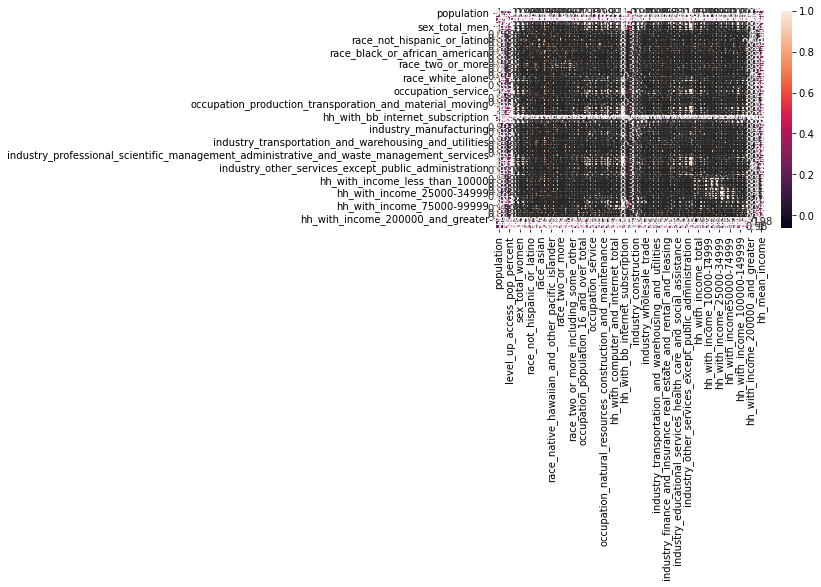

In [32]:
# New df for coreelation matrix and hot map
inc_corr_df = internet_access_df
corrMatrix = inc_corr_df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [33]:
internet_access_df.shape

(58, 52)

In [34]:
# Read in census_family_structure_data and drop duplicate/unnecessary columns
census_family_structure_df = pd.read_csv("../resources/census_api/census_family_structure_data.csv")
census_family_structure_df.drop([ 'county_name', 'county_id', 'state_id'], axis=1, inplace=True)
census_family_structure_df.head()

,geo_id,family_structure_hh_total,family_structure_hh_with_one_or_more_under_18,family_structure_hh_with_none_under_18
0,0500000US06033,25966,6757,19209
1,0500000US06043,7700,1922,5778
2,0500000US06115,26179,10190,15989
3,0500000US06013,392277,141689,250588
4,0500000US06035,9493,2417,7076


In [35]:
# Merging the two tables on 'geo_id' column
internet_access_df = pd.merge(internet_access_df, census_family_structure_df, on =["geo_id"])
# perct = internet_access_df.values
# internet_access_df.iloc[:, 52:] = perct[:, 52:]/perct[:, 1, None]
internet_access_df.head()

,geo_id,population,avg_household_size,level_up_access_pop_percent,sex_total_men,sex_total_women,race_hispanic_or_latino,race_not_hispanic_or_latino,race_american_indian_and_alaska_native,race_asian,...,hh_with_income50000-74999,hh_with_income_75000-99999,hh_with_income_100000-149999,hh_with_income_150000-199999,hh_with_income_200000_and_greater,hh_median_income,hh_mean_income,family_structure_hh_total,family_structure_hh_with_one_or_more_under_18,family_structure_hh_with_none_under_18
0,0500000US06033,64148,2.43,0.880890,31879,32269,12830,51318,2090,642,...,4030,3178,2609,959,708,42475,60847,25966,6757,19209
1,0500000US06043,17540,2.13,0.407778,8920,8620,1909,15631,390,243,...,1465,1060,873,384,162,51199,64590,7700,1922,5778
2,0500000US06115,75493,2.83,0.758733,38468,37025,20990,54503,643,4977,...,4744,3264,3591,1450,674,52624,67391,26179,10190,15989
3,0500000US06013,1133247,2.86,0.976652,553701,579546,288101,845146,2376,182135,...,54684,48475,74344,43088,67295,93712,128079,392277,141689,250588
4,0500000US06035,31185,2.23,0.517515,20671,10514,5834,25351,847,436,...,1979,1171,1388,599,250,56362,71097,9493,2417,7076


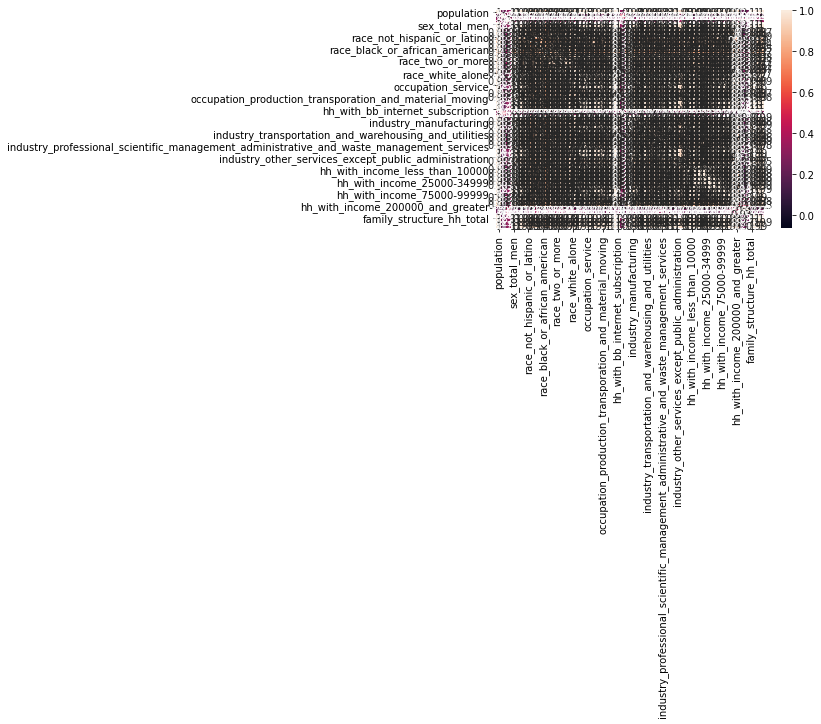

In [36]:
# New df for coreelation matrix and hot map
fam_corr_df = internet_access_df
corrMatrix = fam_corr_df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [37]:
internet_access_df.shape

(58, 55)

In [38]:
# Read in census_employment_data and drop duplicate/unnecessary columns
census_employment_df = pd.read_csv("../resources/census_api/census_employment_data.csv")
census_employment_df.drop([ 'county_name', 'county_id', 'state_id'], axis=1, inplace=True)
census_employment_df.head()

,geo_id,employment_16_and_over_in_labor_force,employment_employed,employment_unemployed,employment_not_in_labor_force,employment_%_unemployment_rate
0,0500000US06033,26145,23589,2556,26171,9.8
1,0500000US06043,7727,7051,676,7284,8.7
2,0500000US06115,31602,28954,2648,23343,8.4
3,0500000US06013,582886,547323,35563,318646,6.1
4,0500000US06035,9358,8788,570,17347,6.1


In [39]:
# Merging the two tables on 'geo_id' column
internet_access_df = pd.merge(internet_access_df, census_employment_df, on =["geo_id"])
# perct = internet_access_df.values
# internet_access_df.iloc[:, 55:] = perct[:, 55:]/perct[:, 1, None]
internet_access_df.head()

,geo_id,population,avg_household_size,level_up_access_pop_percent,sex_total_men,sex_total_women,race_hispanic_or_latino,race_not_hispanic_or_latino,race_american_indian_and_alaska_native,race_asian,...,hh_median_income,hh_mean_income,family_structure_hh_total,family_structure_hh_with_one_or_more_under_18,family_structure_hh_with_none_under_18,employment_16_and_over_in_labor_force,employment_employed,employment_unemployed,employment_not_in_labor_force,employment_%_unemployment_rate
0,0500000US06033,64148,2.43,0.880890,31879,32269,12830,51318,2090,642,...,42475,60847,25966,6757,19209,26145,23589,2556,26171,9.8
1,0500000US06043,17540,2.13,0.407778,8920,8620,1909,15631,390,243,...,51199,64590,7700,1922,5778,7727,7051,676,7284,8.7
2,0500000US06115,75493,2.83,0.758733,38468,37025,20990,54503,643,4977,...,52624,67391,26179,10190,15989,31602,28954,2648,23343,8.4
3,0500000US06013,1133247,2.86,0.976652,553701,579546,288101,845146,2376,182135,...,93712,128079,392277,141689,250588,582886,547323,35563,318646,6.1
4,0500000US06035,31185,2.23,0.517515,20671,10514,5834,25351,847,436,...,56362,71097,9493,2417,7076,9358,8788,570,17347,6.1


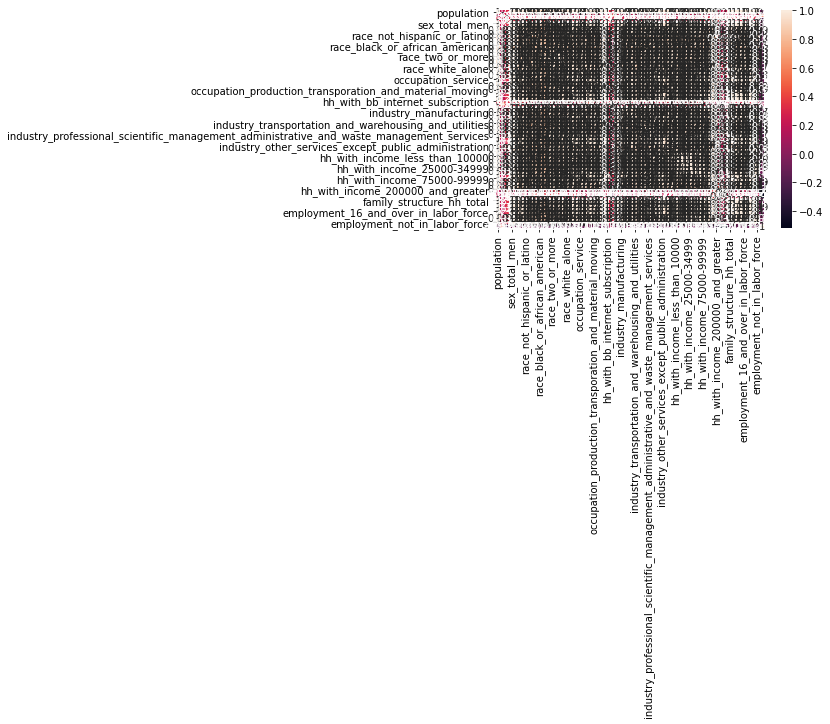

In [40]:
# New df for coreelation matrix and hot map
emp_corr_df = internet_access_df
corrMatrix = emp_corr_df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [41]:
internet_access_df.shape

(58, 60)

In [42]:
# Read in census_education_data and drop duplicate/unnecessary columns
census_education_df = pd.read_csv("../resources/census_api/census_education_data.csv")
census_education_df.drop([ 'county_name', 'county_id', 'state_id'], axis=1, inplace=True)
census_education_df.head()

,geo_id,%_eduction_population_25_and_over_less_than_9th_grade,%_eduction_population_25_and_over_9th-12th_no_diploma,%_eduction_population_25_and_over_high_school_graduate,%_eduction_population_25_and_over_some_college_no_degree,%_eduction_population_25_and_over_associates_degree,%_eduction_population_25_and_over_bachelors_degree,%_eduction_population_25_and_over_graduate_or_professional_degree
0,0500000US06033,5.6,9.2,30.1,27.8,11.5,10.3,5.5
1,0500000US06043,3.2,6.4,26.5,30.6,9.8,14.6,8.8
2,0500000US06115,7.6,10.3,23.1,31.2,11.0,11.7,4.9
3,0500000US06013,5.8,4.9,17.6,21.8,8.3,26.1,15.6
4,0500000US06035,3.8,13.4,33.2,27.8,9.7,8.0,4.1


In [43]:
# Merging the two tables on 'geo_id' column
internet_access_df = pd.merge(internet_access_df, census_education_df, on =["geo_id"])
internet_access_df.head()

,geo_id,population,avg_household_size,level_up_access_pop_percent,sex_total_men,sex_total_women,race_hispanic_or_latino,race_not_hispanic_or_latino,race_american_indian_and_alaska_native,race_asian,...,employment_unemployed,employment_not_in_labor_force,employment_%_unemployment_rate,%_eduction_population_25_and_over_less_than_9th_grade,%_eduction_population_25_and_over_9th-12th_no_diploma,%_eduction_population_25_and_over_high_school_graduate,%_eduction_population_25_and_over_some_college_no_degree,%_eduction_population_25_and_over_associates_degree,%_eduction_population_25_and_over_bachelors_degree,%_eduction_population_25_and_over_graduate_or_professional_degree
0,0500000US06033,64148,2.43,0.880890,31879,32269,12830,51318,2090,642,...,2556,26171,9.8,5.6,9.2,30.1,27.8,11.5,10.3,5.5
1,0500000US06043,17540,2.13,0.407778,8920,8620,1909,15631,390,243,...,676,7284,8.7,3.2,6.4,26.5,30.6,9.8,14.6,8.8
2,0500000US06115,75493,2.83,0.758733,38468,37025,20990,54503,643,4977,...,2648,23343,8.4,7.6,10.3,23.1,31.2,11.0,11.7,4.9
3,0500000US06013,1133247,2.86,0.976652,553701,579546,288101,845146,2376,182135,...,35563,318646,6.1,5.8,4.9,17.6,21.8,8.3,26.1,15.6
4,0500000US06035,31185,2.23,0.517515,20671,10514,5834,25351,847,436,...,570,17347,6.1,3.8,13.4,33.2,27.8,9.7,8.0,4.1


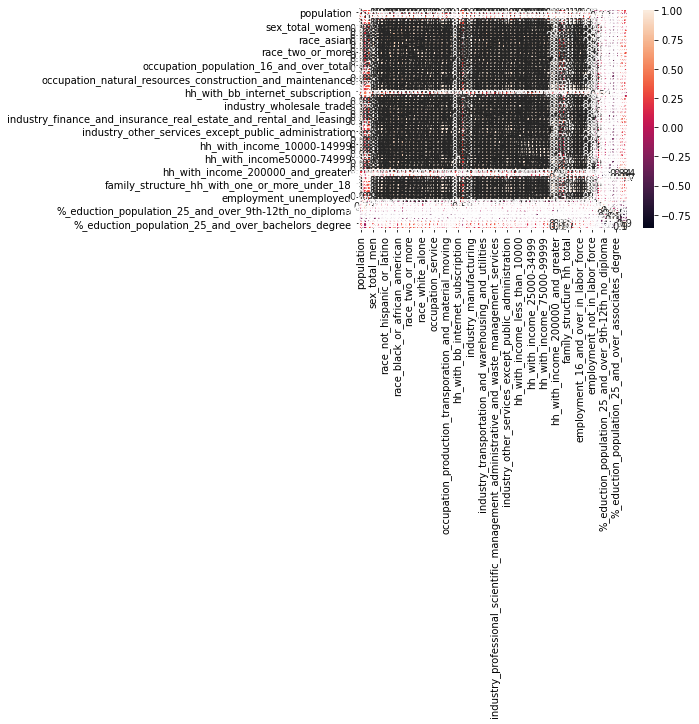

In [44]:
# New df for coreelation matrix and hot map
edu_corr_df = internet_access_df
corrMatrix = edu_corr_df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [45]:
internet_access_df.shape

(58, 67)

In [46]:
# Read in census_disability_data and drop duplicate/unnecessary columns
census_disability_df = pd.read_csv("../resources/census_api/census_disability_data.csv")
census_disability_df.drop([ 'county_name', 'county_id', 'state_id'], axis=1, inplace=True)
census_disability_df.head()

,geo_id,disability_population_under_18,disability_population_18-64,disability_population_65_and_over,disability_under_18_with_disability,disability_18-64_with_disability,disability_64_and_over_with_disability
0,0500000US06033,13272,36442,13737,399,6505,5862
1,0500000US06043,2860,9845,4665,145,1528,1527
2,0500000US06115,20850,43487,9002,1049,6852,3671
3,0500000US06013,260902,699892,167209,9942,62588,54212
4,0500000US06035,4891,12457,4028,269,1807,1523


In [47]:
# Merging the two tables on 'geo_id' column
internet_access_df = pd.merge(internet_access_df, census_disability_df, on =["geo_id"])
# perct = internet_access_df.values
# internet_access_df.iloc[:, 67:] = perct[:, 67:]/perct[:, 1, None]
internet_access_df.head()

,geo_id,population,avg_household_size,level_up_access_pop_percent,sex_total_men,sex_total_women,race_hispanic_or_latino,race_not_hispanic_or_latino,race_american_indian_and_alaska_native,race_asian,...,%_eduction_population_25_and_over_some_college_no_degree,%_eduction_population_25_and_over_associates_degree,%_eduction_population_25_and_over_bachelors_degree,%_eduction_population_25_and_over_graduate_or_professional_degree,disability_population_under_18,disability_population_18-64,disability_population_65_and_over,disability_under_18_with_disability,disability_18-64_with_disability,disability_64_and_over_with_disability
0,0500000US06033,64148,2.43,0.880890,31879,32269,12830,51318,2090,642,...,27.8,11.5,10.3,5.5,13272,36442,13737,399,6505,5862
1,0500000US06043,17540,2.13,0.407778,8920,8620,1909,15631,390,243,...,30.6,9.8,14.6,8.8,2860,9845,4665,145,1528,1527
2,0500000US06115,75493,2.83,0.758733,38468,37025,20990,54503,643,4977,...,31.2,11.0,11.7,4.9,20850,43487,9002,1049,6852,3671
3,0500000US06013,1133247,2.86,0.976652,553701,579546,288101,845146,2376,182135,...,21.8,8.3,26.1,15.6,260902,699892,167209,9942,62588,54212
4,0500000US06035,31185,2.23,0.517515,20671,10514,5834,25351,847,436,...,27.8,9.7,8.0,4.1,4891,12457,4028,269,1807,1523


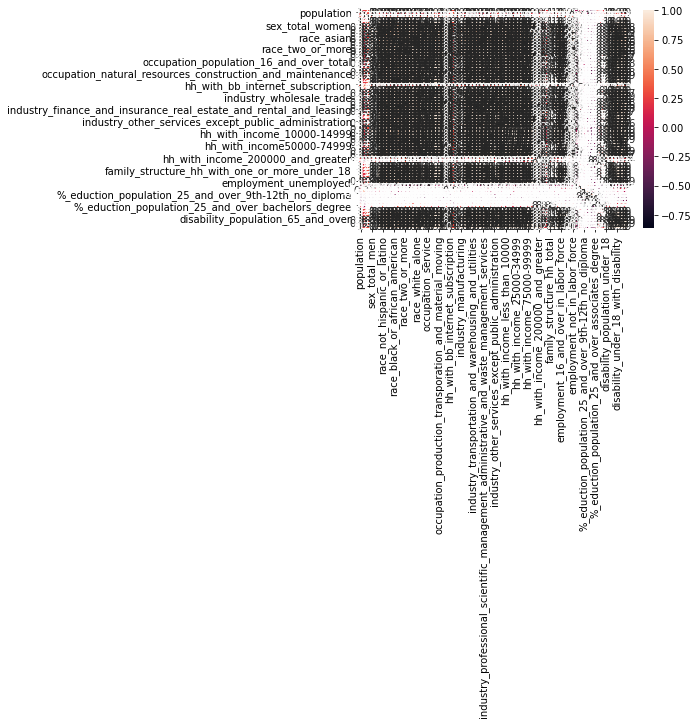

In [48]:
# New df for coreelation matrix and hot map
dis_corr_df = internet_access_df
corrMatrix = dis_corr_df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [49]:
internet_access_df.shape

(58, 73)

In [50]:
# Read in census_citizenship_data and drop duplicate/unnecessary columns
census_citizenship_df = pd.read_csv("../resources/census_api/census_citizenship_data.csv")
census_citizenship_df.drop(['citizenship_total_population', 'county_name', 'county_id', 'state_id'], axis=1, inplace=True)
census_citizenship_df.head()

,geo_id,citizenship_native_born,citizenship_foreign_born
0,0500000US06033,58466,5682
1,0500000US06043,16293,1247
2,0500000US06115,66060,9433
3,0500000US06013,850039,283208
4,0500000US06035,29559,1626


In [51]:
# Merging the two tables on 'geo_id' column
internet_access_df = pd.merge(internet_access_df, census_citizenship_df, on =["geo_id"])
# perct = internet_access_df.values
# internet_access_df.iloc[:, 73:] = perct[:, 73:]/perct[:, 1, None]
internet_access_df.head()

,geo_id,population,avg_household_size,level_up_access_pop_percent,sex_total_men,sex_total_women,race_hispanic_or_latino,race_not_hispanic_or_latino,race_american_indian_and_alaska_native,race_asian,...,%_eduction_population_25_and_over_bachelors_degree,%_eduction_population_25_and_over_graduate_or_professional_degree,disability_population_under_18,disability_population_18-64,disability_population_65_and_over,disability_under_18_with_disability,disability_18-64_with_disability,disability_64_and_over_with_disability,citizenship_native_born,citizenship_foreign_born
0,0500000US06033,64148,2.43,0.880890,31879,32269,12830,51318,2090,642,...,10.3,5.5,13272,36442,13737,399,6505,5862,58466,5682
1,0500000US06043,17540,2.13,0.407778,8920,8620,1909,15631,390,243,...,14.6,8.8,2860,9845,4665,145,1528,1527,16293,1247
2,0500000US06115,75493,2.83,0.758733,38468,37025,20990,54503,643,4977,...,11.7,4.9,20850,43487,9002,1049,6852,3671,66060,9433
3,0500000US06013,1133247,2.86,0.976652,553701,579546,288101,845146,2376,182135,...,26.1,15.6,260902,699892,167209,9942,62588,54212,850039,283208
4,0500000US06035,31185,2.23,0.517515,20671,10514,5834,25351,847,436,...,8.0,4.1,4891,12457,4028,269,1807,1523,29559,1626


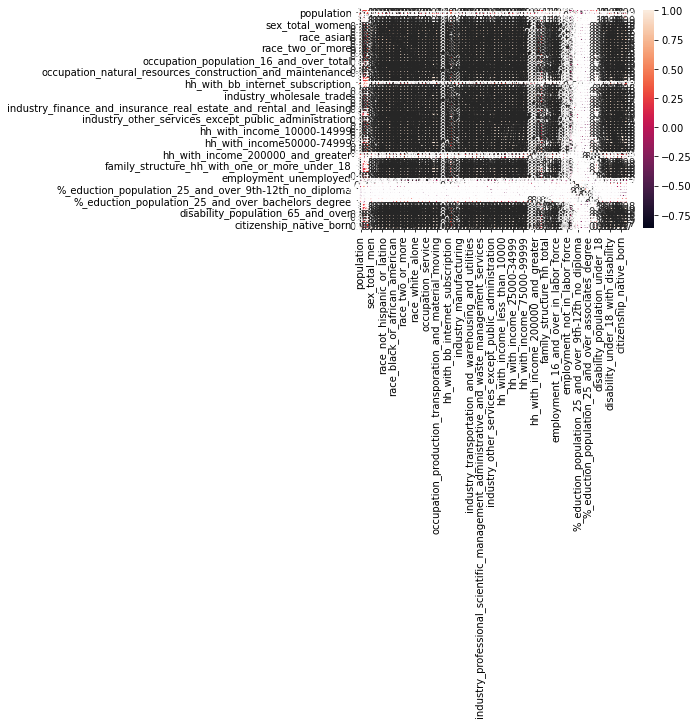

In [52]:
# New df for coreelation matrix and hot map
cit_corr_df = internet_access_df
corrMatrix = cit_corr_df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [53]:
internet_access_df.shape

(58, 75)

In [54]:
# Read in census_age_data and drop duplicate/unnecessary columns
census_age_df = pd.read_csv("../resources/census_api/census_age_data.csv")
census_age_df.drop(['county_name', 'county_id', 'state_id'], axis=1, inplace=True)
census_age_df.head()

,geo_id,age_under_5,age_5-9,age_10-14,age_15-19,age_20-24,age_25-34,age_35-44,age_45-54,age_55-59,age_60-64,age_65-74,age_75-84,age_85_and_over
0,0500000US06033,3683,3828,3496,3516,3231,6973,6706,8097,5137,5540,8591,3975,1375
1,0500000US06043,762,761,751,804,803,1885,1614,2284,1503,1683,2778,1556,356
2,0500000US06115,6126,5796,5815,4955,5600,11930,9193,8410,4592,4001,5647,2311,1117
3,0500000US06013,65505,73025,76328,72857,68013,143793,151683,164203,78858,69200,99537,48565,21680
4,0500000US06035,1384,1272,1477,1444,3218,6287,4353,3899,1803,1891,2504,1250,403


In [55]:
# Merging the two tables on 'geo_id' column
internet_access_df = pd.merge(internet_access_df, census_age_df, on =["geo_id"])
# perct = internet_access_df.values
# internet_access_df.iloc[:, 75:] = perct[:, 75:]/perct[:, 1, None]
internet_access_df.head()

,geo_id,population,avg_household_size,level_up_access_pop_percent,sex_total_men,sex_total_women,race_hispanic_or_latino,race_not_hispanic_or_latino,race_american_indian_and_alaska_native,race_asian,...,age_15-19,age_20-24,age_25-34,age_35-44,age_45-54,age_55-59,age_60-64,age_65-74,age_75-84,age_85_and_over
0,0500000US06033,64148,2.43,0.880890,31879,32269,12830,51318,2090,642,...,3516,3231,6973,6706,8097,5137,5540,8591,3975,1375
1,0500000US06043,17540,2.13,0.407778,8920,8620,1909,15631,390,243,...,804,803,1885,1614,2284,1503,1683,2778,1556,356
2,0500000US06115,75493,2.83,0.758733,38468,37025,20990,54503,643,4977,...,4955,5600,11930,9193,8410,4592,4001,5647,2311,1117
3,0500000US06013,1133247,2.86,0.976652,553701,579546,288101,845146,2376,182135,...,72857,68013,143793,151683,164203,78858,69200,99537,48565,21680
4,0500000US06035,31185,2.23,0.517515,20671,10514,5834,25351,847,436,...,1444,3218,6287,4353,3899,1803,1891,2504,1250,403


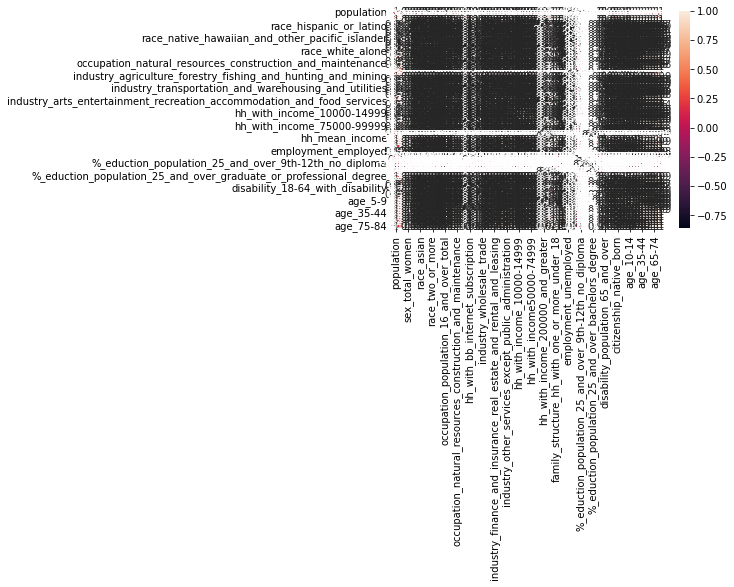

<Figure size 1440x288 with 0 Axes>

In [56]:
# New df for coreelation matrix and hot map
age_corr_df = internet_access_df
corrMatrix = age_corr_df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.figure(figsize=(20,4))
plt.show()

In [57]:
internet_access_df.shape

(58, 88)

In [58]:
# Import county csv dataset and drop unnecessary columns
county_df = pd.read_csv("../resources/census_api/county.csv")
county_df.drop(['county_id', 'state_id'], axis=1, inplace=True)
county_df.head()

,geo_id,county_name
0,0500000US06033,Lake County
1,0500000US06043,Mariposa County
2,0500000US06115,Yuba County
3,0500000US06013,Contra Costa County
4,0500000US06035,Lassen County


In [59]:
# Merging the two tables on 'geo_id' column
internet_access_df = pd.merge(county_df, internet_access_df, on =["geo_id"])
internet_access_df.head()

,geo_id,county_name,population,avg_household_size,level_up_access_pop_percent,sex_total_men,sex_total_women,race_hispanic_or_latino,race_not_hispanic_or_latino,race_american_indian_and_alaska_native,...,age_15-19,age_20-24,age_25-34,age_35-44,age_45-54,age_55-59,age_60-64,age_65-74,age_75-84,age_85_and_over
0,0500000US06033,Lake County,64148,2.43,0.880890,31879,32269,12830,51318,2090,...,3516,3231,6973,6706,8097,5137,5540,8591,3975,1375
1,0500000US06043,Mariposa County,17540,2.13,0.407778,8920,8620,1909,15631,390,...,804,803,1885,1614,2284,1503,1683,2778,1556,356
2,0500000US06115,Yuba County,75493,2.83,0.758733,38468,37025,20990,54503,643,...,4955,5600,11930,9193,8410,4592,4001,5647,2311,1117
3,0500000US06013,Contra Costa County,1133247,2.86,0.976652,553701,579546,288101,845146,2376,...,72857,68013,143793,151683,164203,78858,69200,99537,48565,21680
4,0500000US06035,Lassen County,31185,2.23,0.517515,20671,10514,5834,25351,847,...,1444,3218,6287,4353,3899,1803,1891,2504,1250,403


In [61]:
internet_access_df['ID'] = internet_access_df['geo_id'] + '-' + internet_access_df['county_name']
internet_access_df.drop(['geo_id', 'county_name'], axis = 1, inplace = True)
v = internet_access_df[list(internet_access_df.columns)[-1]]
internet_access_df = internet_access_df.drop(['ID'], axis = 1)
internet_access_df.insert(0, 'ID', v)
internet_access_df.head()

,ID,population,avg_household_size,level_up_access_pop_percent,sex_total_men,sex_total_women,race_hispanic_or_latino,race_not_hispanic_or_latino,race_american_indian_and_alaska_native,race_asian,...,age_15-19,age_20-24,age_25-34,age_35-44,age_45-54,age_55-59,age_60-64,age_65-74,age_75-84,age_85_and_over
0,0500000US06033-Lake County,64148,2.43,0.880890,31879,32269,12830,51318,2090,642,...,3516,3231,6973,6706,8097,5137,5540,8591,3975,1375
1,0500000US06043-Mariposa County,17540,2.13,0.407778,8920,8620,1909,15631,390,243,...,804,803,1885,1614,2284,1503,1683,2778,1556,356
2,0500000US06115-Yuba County,75493,2.83,0.758733,38468,37025,20990,54503,643,4977,...,4955,5600,11930,9193,8410,4592,4001,5647,2311,1117
3,0500000US06013-Contra Costa County,1133247,2.86,0.976652,553701,579546,288101,845146,2376,182135,...,72857,68013,143793,151683,164203,78858,69200,99537,48565,21680
4,0500000US06035-Lassen County,31185,2.23,0.517515,20671,10514,5834,25351,847,436,...,1444,3218,6287,4353,3899,1803,1891,2504,1250,403


In [62]:
# Export df as a csv
internet_access_df.to_csv("../resources/regression_ml_model/merged_internet_access.csv", index=False)